# Processamento de linguagem natural (PLN) 

## Introdução

In [ ]:
from google.colab import files

file = files.upload()

Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


In [ ]:
import nltk
#nltk.download()  #<-- Run this if it's your first time using nltk to download all of the datasets and models
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
data.rename(columns={'Review': 'reviews', 'Rating': 'stars'}, inplace=True)
data.head(2)

,reviews,stars
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2


## Conhecendo os dados ##

* Determine quantas revisões há no total.
* Determine a porcentagem de revisões por estrela 1, 2, 3, 4, 5.
* Determine a distribuição do número de caracteres das revisões. Listando os valores  plotando o histograma.

In [ ]:
# Número de revisões
len(data)

20491

In [ ]:
data.isnull().sum()

reviews    0
stars      0
tokens     0
dtype: int64

In [ ]:
# Porcentagem de revisões por estrela
data.stars.value_counts(normalize=True)

5    0.441853
4    0.294715
3    0.106583
2    0.087502
1    0.069348
Name: stars, dtype: float64

In [ ]:
# Número de caracteres x número de revisões 
data.reviews.map(len).value_counts().head()

444    43
403    43
431    40
351    40
316    39
Name: reviews, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

%matplotlib inline

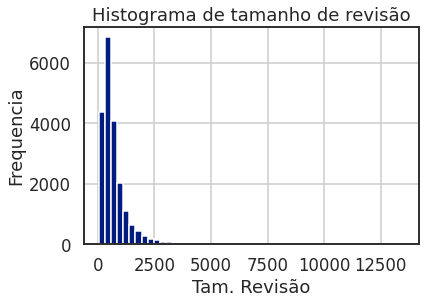

In [ ]:
# Histograma dos tamanhos das revisões em caractere
ax = data.reviews.map(len).hist(bins=50)
ax.set(xlabel='Tam. Revisão', ylabel='Frequencia', title='Histograma de tamanho de revisão');

## Pré-processamento ##

* Aplicando as seguintes etapas de pré-processamento:

     1. Remova as palavras que contém números
     2. Torne todo texto minusculo
     3. Remova pontuação
     4. Tokenize as revisões em palavras
     
     
* Encontre as palavras mais comuns.
* Determine a distribuição do tamanho das palavras no corpus.

In [ ]:
# Vamos ver como são os dados
data.head()

,reviews,stars
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
# Exemplo de uma revisão
data.iloc[2,0]

"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 6

In [ ]:
# A expressão regular abaixo remove toda palavra com número e torna as palavras minusculas
import re

lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
data['reviews'] = data.reviews.map(lower_alpha)

data.head()

,reviews,stars
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not * experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
# Removendo as pontuações
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
data['reviews'] = data.reviews.map(punc_re)

data.head()

,reviews,stars
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not experience hotel monaco seat...,3
3,unique great stay wonderful time hotel monac...,5
4,great stay great stay went seahawk game aweso...,5


In [ ]:
# Revisão após alguns pré-processamentos de limpeza
data.iloc[2,0]

'nice rooms not    experience hotel monaco seattle good hotel n t    level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized  missed   separate wakeup calls  concierge busy hard touch  did n t provide guidance special requests tv hard use ipod sound dock suite non functioning  decided book mediterranean suite   night weekend stay   choice rest party filled  comparison w spent   night larger square footage room great soaking tub whirlpool jets nice shower before stay hotel arrange car service price   tip reasonable driver waiting arrival checkin easy downside room picked   person jacuzi tub no bath accessories salts bubble bath did n t stay  night got     checked voucher bottle champagne nice gesture fish waiting room  impression room huge open space felt room big  tv far away bed chore change channel  ipod dock broken disappointing in morning way asked desk check thermostat said       d

In [ ]:
# Tokenize a revisão em palavras
from nltk.tokenize import word_tokenize

data['tokens'] = data.reviews.map(word_tokenize)
data.head()

,reviews,stars,tokens
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not experience hotel monaco seat...,3,"[nice, rooms, not, experience, hotel, monaco, ..."
3,unique great stay wonderful time hotel monac...,5,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game aweso...,5,"[great, stay, great, stay, went, seahawk, game..."


In [ ]:
# Essa etapa cria uma grande lista combinando os valores dos tokens
word_list = list(pd.concat([pd.Series(x) for x in data.tokens.tolist()], axis=0))

word_list[:10]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary']

In [ ]:
# Encontrando as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com a contagem dos valores
word_counts = Counter(word_list)

# Inverte chave/valor no dicionário para ordenar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Ordena a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Mostra as 10 palavras mais frequentes
word_counts[:10]

[(49877, 'hotel'),
 (35356, 'room'),
 (31711, 'not'),
 (21482, 'great'),
 (19458, 't'),
 (19089, 'n'),
 (17418, 'good'),
 (16637, 'staff'),
 (15413, 'stay'),
 (14007, 'did')]

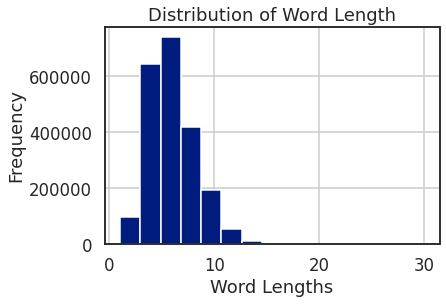

In [ ]:
# Distribuição do tamanho das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

## Mais pré-processamento ##

* Aplicando as seguintes técnicas de pré-processamento:

     * Remova stopwords
     * Faça o reconhecimento de partes do discurso
     * Stemização
     * Lematização

Recomendação: crie uma nova coluna em seu conjunto de dados para cada técnica de pré-processamento que você aplicar, para que possa ver a progressão do texto das revisões.

In [ ]:
# Remove stop words
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
data['tokens_stop'] = data.tokens.apply(stop_lambda)
data.head()

,reviews,stars,tokens,tokens_stop
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not experience hotel monaco seat...,3,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt..."
3,unique great stay wonderful time hotel monac...,5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game aweso...,5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [ ]:
# Parte do discurso
from nltk.tag import pos_tag

pos_lambda = lambda x: nltk.pos_tag(x)
data['tokens_pos'] = (data.tokens_stop.apply(pos_lambda))
data.head()

,reviews,stars,tokens,tokens_stop,tokens_pos
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[(nice, JJ), (hotel, NN), (expensive, JJ), (pa..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[(ok, JJ), (nothing, NN), (special, JJ), (char..."
2,nice rooms not experience hotel monaco seat...,3,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...","[(nice, JJ), (rooms, NNS), (experience, VBP), ..."
3,unique great stay wonderful time hotel monac...,5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, JJ), (great, JJ), (stay, NN), (wonde..."
4,great stay great stay went seahawk game aweso...,5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, JJ), (stay, NN), (great, JJ), (stay, ..."


In [ ]:
# Stemização
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

data['tokens_stem'] = data.tokens_stop.apply(stem_lambda)
data.head()

,reviews,stars,tokens,tokens_stop,tokens_pos,tokens_stem
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[(nice, JJ), (hotel, NN), (expensive, JJ), (pa...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[(ok, JJ), (nothing, NN), (special, JJ), (char...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not experience hotel monaco seat...,3,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...","[(nice, JJ), (rooms, NNS), (experience, VBP), ...","[nice, room, experi, hotel, monaco, seattl, go..."
3,unique great stay wonderful time hotel monac...,5,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, JJ), (great, JJ), (stay, NN), (wonde...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,great stay great stay went seahawk game aweso...,5,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, JJ), (stay, NN), (great, JJ), (stay, ...","[great, stay, great, stay, went, seahawk, game..."


In [ ]:
# Lematização
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
data['tokens_lemma'] = data.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])


data.head().T

,0,1,2,3,4
reviews,nice hotel expensive parking got good deal sta...,ok nothing special charge diamond member hilto...,nice rooms not experience hotel monaco seat...,unique great stay wonderful time hotel monac...,great stay great stay went seahawk game aweso...
stars,4,2,3,5,5
tokens,"[nice, hotel, expensive, parking, got, good, d...","[ok, nothing, special, charge, diamond, member...","[nice, rooms, not, experience, hotel, monaco, ...","[unique, great, stay, wonderful, time, hotel, ...","[great, stay, great, stay, went, seahawk, game..."
tokens_stop,"[nice, hotel, expensive, parking, got, good, d...","[ok, nothing, special, charge, diamond, member...","[nice, rooms, experience, hotel, monaco, seatt...","[unique, great, stay, wonderful, time, hotel, ...","[great, stay, great, stay, went, seahawk, game..."
tokens_pos,"[(nice, JJ), (hotel, NN), (expensive, JJ), (pa...","[(ok, JJ), (nothing, NN), (special, JJ), (char...","[(nice, JJ), (rooms, NNS), (experience, VBP), ...","[(unique, JJ), (great, JJ), (stay, NN), (wonde...","[(great, JJ), (stay, NN), (great, JJ), (stay, ..."
tokens_stem,"[nice, hotel, expens, park, got, good, deal, s...","[ok, noth, special, charg, diamond, member, hi...","[nice, room, experi, hotel, monaco, seattl, go...","[uniqu, great, stay, wonder, time, hotel, mona...","[great, stay, great, stay, went, seahawk, game..."
tokens_lemma,"[nice, hotel, expensive, parking, get, good, d...","[ok, nothing, special, charge, diamond, member...","[nice, room, experience, hotel, monaco, seattl...","[unique, great, stay, wonderful, time, hotel, ...","[great, stay, great, stay, go, seahawk, game, ..."


* Depois de passar por essas etapas de pré-processamento, quais são os mais palavras comuns agora? Eles fazem mais sentido?

In [ ]:
# Vamos encontrar as palavras mais comuns após limpar os dados

# Isso cria uma lista enorme, combinando todos os valores de tokens
word_list_clean = list(pd.concat([pd.Series(x) for x in data.tokens_stem.tolist()], axis=0))

word_list_clean[:10]

['nice',
 'hotel',
 'expens',
 'park',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversari']

In [ ]:
from collections import Counter

# Converts list to a dictionary with value counts
word_counts_clean = Counter(word_list_clean)

# Reverse the key/values in the dictionary for sorting
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Sort the list by count
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Prints the 10 most commons words
word_counts_clean[:10]

[(58639, 'hotel'),
 (52455, 'room'),
 (31426, 'stay'),
 (23732, 'great'),
 (21205, 'n'),
 (19052, 'good'),
 (18195, 'staff'),
 (16332, 'night'),
 (15221, 'locat'),
 (14843, 'day')]

## Análise de sentimentos

Crie um novo conjunto de dados para modelagem com as seguintes colunas:
     - Coluna 1: 'positivo' se revisão = 4 ou 5 e 'negativo' se revisão = 1 ou 2
     - Coluna 2: texto de revisão
* Dê uma olhada no número de avaliações positivas e negativas no conjunto de dados recém-criado.

Use o código de pré-processamento abaixo para limpar os dados das revisões antes de prosseguir para a modelagem.

In [ ]:
import numpy as np

# Set 4/5 star reviews to positive, the rest to negative
data['sentiment'] = np.where(data['stars'] >= 4, 'positive', 'negative')

# Include only the sentiment and reviews columns
data = data[['sentiment', 'reviews']]
data.head()

,sentiment,reviews
0,positive,nice hotel expensive parking got good deal sta...
1,negative,ok nothing special charge diamond member hilto...
2,negative,nice rooms not experience hotel monaco seat...
3,positive,unique great stay wonderful time hotel monac...
4,positive,great stay great stay went seahawk game aweso...


In [ ]:
data.shape

(20491, 2)

In [ ]:
# Note that the dataset has mostly positive reviews
data.sentiment.value_counts(normalize=True)

positive    0.736567
negative    0.263433
Name: sentiment, dtype: float64

Prepare os dados para modelagem:
* Divida os dados em conjuntos de treinamento e teste. Você deve ter quatro conjuntos de dados - X_train, X_test, y_train, y_test

Crie recursos numéricos com Count Vectorizer. Crie duas matrizes de termo de documento:
* Matriz 1: os termos devem ser unigramas (palavras simples) e os valores devem ser contagens de palavras (Dica: este é o padrão do vetorizador de contagem)
* Matriz 2: os termos devem ser unigramas e bigramas, e os valores devem ser valores binários

Recomendação: Utilize a função de palavras irrelevantes do Count Vectorizer para remover palavras irrelevantes do texto de comentários.

In [ ]:
# Split the data into X and y data sets
X = data.reviews
y = data.sentiment

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Number of reviews in the training set
X_train.shape, y_train.shape

((14343,), (14343,))

In [ ]:
# Number of reviews in the test set
X_test.shape, y_test.shape

((6148,), (6148,))

In [ ]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

X_train_cv = cv.fit_transform(X_train)
X_test_cv  = cv.transform(X_test)

print(X_train_cv.toarray().shape)

(14343, 40956)


In [ ]:
print(X_train_cv)

  (0, 15920)	3
  (0, 34131)	5
  (0, 15647)	2
  (0, 39888)	3
  (0, 177)	1
  (0, 26114)	1
  (0, 34353)	1
  (0, 24274)	1
  (0, 38563)	1
  (0, 6783)	1
  (0, 17468)	7
  (0, 3196)	1
  (0, 27911)	1
  (0, 6500)	1
  (0, 11108)	4
  (0, 31862)	3
  (0, 7793)	1
  (0, 8244)	1
  (0, 4727)	1
  (0, 28317)	1
  (0, 32527)	2
  (0, 11564)	2
  (0, 33979)	2
  (0, 38617)	1
  (0, 182)	2
  :	:
  (14342, 4381)	1
  (14342, 26963)	1
  (14342, 2106)	1
  (14342, 26309)	1
  (14342, 14304)	1
  (14342, 26211)	1
  (14342, 799)	1
  (14342, 31240)	1
  (14342, 32295)	1
  (14342, 26598)	1
  (14342, 22148)	1
  (14342, 31238)	1
  (14342, 36542)	1
  (14342, 33829)	1
  (14342, 24438)	1
  (14342, 39718)	1
  (14342, 9026)	1
  (14342, 10113)	1
  (14342, 39533)	1
  (14342, 17258)	1
  (14342, 39843)	1
  (14342, 2414)	1
  (14342, 36215)	1
  (14342, 16728)	1
  (14342, 39902)	1


Use a regressão logística para classificar as avaliações como positivas ou negativas. Faça isso para ambas as matrizes.
* Ajustar um modelo de regressão logística nos dados de treinamento
* Aplique o modelo nos dados de teste e calcule as seguintes métricas de erro: acurácia, precisão, recuperação (recall), pontuação F1
* Opcional: Visualize a matriz de confusão para ambos os modelos
* Compare as métricas de erro das duas matrizes

Recomendação: crie uma função para calcular as métricas de erro, já que você fará isso várias vezes.

In [ ]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)

In [ ]:
# Train the first model
lr.fit(X_train_cv, y_train)
y_pred_cv = lr.predict(X_test_cv)

In [ ]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]
    
    a = true_pos + true_neg
    b = true_pos + true_neg + false_pos + false_neg
    print (a/b)
    
    accuracy = round(float((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)),3)
    precision = round(float((true_pos) / (true_pos + false_pos)),3)
    recall = round(float((true_pos) / (true_pos + false_neg)),3)
    f1 = round(float(2 * (precision * recall) / (precision + recall)),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

0.8845152895250488


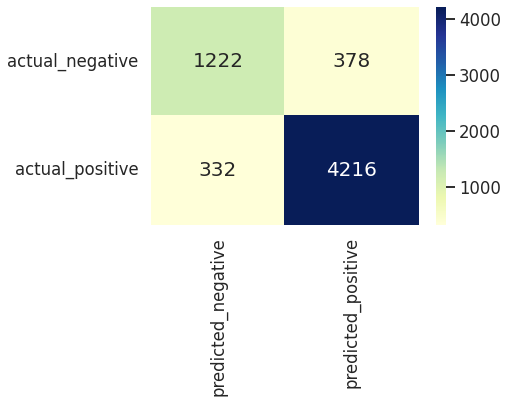

In [ ]:
# The heat map for the logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv)

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(cm1))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg']
results

,LogReg
Accuracy,0.885
Precision,0.918
Recall,0.927
F1 Score,0.922


Vamos tentar usar outra técnica de aprendizado de máquina para classificar essas avaliações como positivas ou negativas. Faça exatamente o mesmo exercício da etapa anterior, mas, desta vez, use Naive Bayes em vez de Regressão logística.

Para dados contínuos, use [Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). Para dados binários, use [Bernoulli Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB).

Compare os resultados.

In [ ]:
# Fit the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)

y_pred_cv_nb = mnb.predict(X_test_cv)

0.8845152895250488


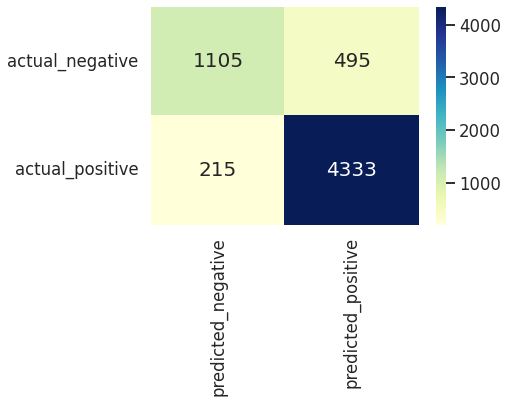

In [ ]:
# Here's the heat map for the first Naive Bayes model
cm2 = conf_matrix(y_test, y_pred_cv_nb)

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(cm2))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg,NB
Accuracy,0.885,0.885
Precision,0.918,0.897
Recall,0.927,0.953
F1 Score,0.922,0.924


Até este ponto, usamos o Count Vectorizer para criar matrizes de termos de documentos para inserir nos modelos. Para pelo menos um dos quatro modelos que você criou até agora, use TF-IDF Vectorizer em vez de Count Vectorizer e veja se melhora os resultados.

In [ ]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

0.8975276512687053


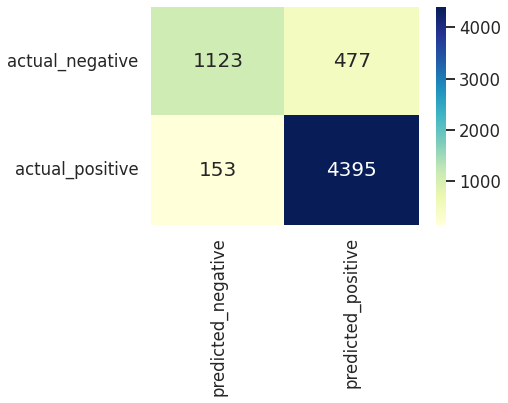

In [ ]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf, y_train)
y_pred_tfidf_lr = lr.predict(X_test_tfidf)
cm3 = conf_matrix(y_test, y_pred_tfidf_lr)

0.7602472348731295


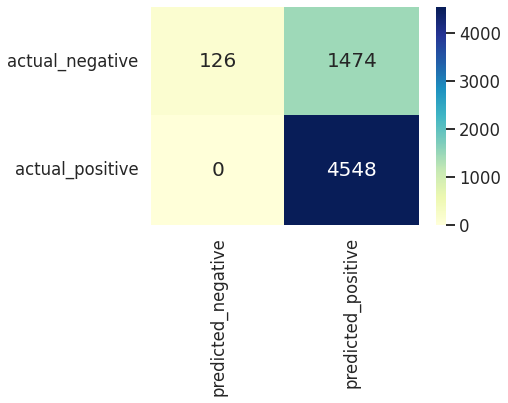

In [ ]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf.toarray(), y_train)
y_pred_tfidf_nb = mnb.predict(X_test_tfidf)
cm4 = conf_matrix(y_test, y_pred_tfidf_nb)

In [ ]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm3, cm4)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR-TFIDF', 'NB-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LogReg,NB,LR-TFIDF,NB-TFIDF
Accuracy,0.885,0.885,0.898,0.760
Precision,0.918,0.897,0.902,0.755
Recall,0.927,0.953,0.966,1.000
F1 Score,0.922,0.924,0.933,0.860
